In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import pandas as pd

from diffusing_neutrons import DiffusingNeutrons

SyntaxError: invalid syntax (2875797582.py, line 7)

NameError: name 'Neutron' is not defined

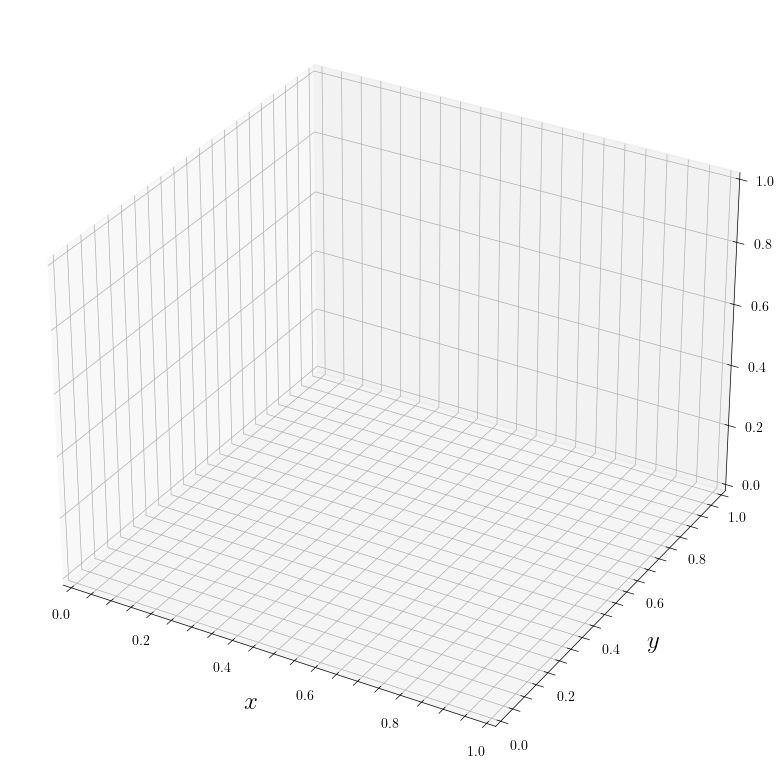

In [2]:
plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
for _ in range(100):
    neutron = Neutron(N=30)
    neutron.walk(r0=np.array([0.0,0.0,0.0]))
    x, y, z = list(zip(*neutron.positions))
    plt.plot(x, y, z, c="C0")

plt.plot(0, 0, 0, "o", c="r")
plt.show()

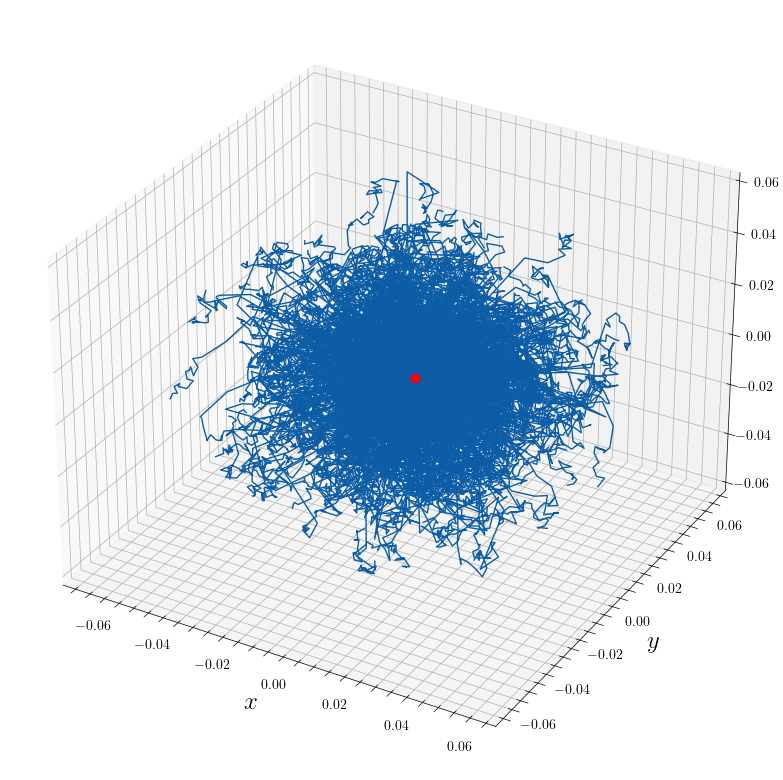

In [9]:
data = pd.read_csv("data/mean_free_path.csv")
mean_free_paths = list(data["lambda(m)"])
energies = list(data["Energy(eV)"])

diffusing_neutrons = DiffusingNeutrons(nNeutrons=1000, nCollisions=20, mean_free_paths=mean_free_paths, energies=energies)
diffusing_neutrons.diffuse()


plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
for neutron in diffusing_neutrons.neutrons:
    x, y, z = list(zip(*neutron.positions))
    plt.plot(x, y, z, c="C0")

plt.plot(0, 0, 0, "o", c="r")
plt.show()